<a href="https://colab.research.google.com/github/Rohankukwas/Almabetter-AIr-bnb-capstone-project/blob/main/Rohan_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### Team Member 1 - Rohan kukwas


# **Project Summary -** Exploratory Data Analysis (EDA) on Airbnb Dataset


In this exploratory data analysis (EDA) project, we have analyzed a dataset consisting of around 49,000 observations from Airbnb listings in New York City. The dataset contains 16 columns, including information about hosts, neighborhoods, pricing, and reviews. Our goal was to gain insights into the behavior of guests and hosts on the Airbnb platform, inform business decisions, and provide valuable insights into the hospitality industry.

We started by preprocessing the data, which involved dropping columns with missing values, handling missing values in the 'reviews_per_month' column, and imputing zero and NaN values in the 'price' column. We calculated the mean price of Airbnb listings and used it to fill the missing values in the 'price' column. We also converted the 'last_review' column to a datetime object for further analysis.

We then conducted various analyses to extract meaningful insights from the dataset. We filtered the data based on price range and focused on listings with prices between $50 and $500. This allowed us to analyze neighborhood pricing, identifying the most expensive and least expensive neighborhoods to stay in, as well as average availability of listings by neighborhood group.

We also performed host analysis, examining the number of hosts in each neighborhood group, average prices by neighborhood, and average preferred prices by location and room type. Additionally, we analyzed the number of reviews per location and identified top hosts based on prices and majority listing types.

For time-series analysis, we filled missing values in the 'last_review' column, resampled the data by day, and interpolated missing values based on time-series data. This analysis helped us understand the busiest seasons for Airbnb bookings in New York City.

Finally, we explored the percentage of hosts with single listings, which provided insights into the distribution of hosts with multiple listings on the platform.

Based on the findings from our EDA, we recommend the following actions for optimizing the Airbnb pricing strategy and improving customer satisfaction:

1)  Adjust pricing strategy based on observed trends and customers' willingness to pay. Consider prices in different neighborhoods and adjust accordingly to optimize revenue.

2) Focus marketing efforts on the top 10 cheapest and most expensive neighborhoods to attract more renters. Create targeted campaigns to increase visibility and capture the attention of potential customers.

3) Address issues mentioned in reviews and ratings to improve customer satisfaction and encourage positive word-of-mouth. Take feedback seriously and make necessary changes to provide a better experience for guests.

4)  Offer special deals and promotions to experienced hosts as incentives for their continued engagement. This will encourage them to provide excellent service and contribute to the success of the platform.

Additionally, analyze the number of reviews and ratings to identify popular listings and areas with potential for growth. By understanding which properties receive more attention, you can focus on those and expand in those areas to drive further success.

Overall, this EDA project provides valuable insights into the behavior of guests and hosts on the Airbnb platform, allowing for informed business decisions and a better understanding of the hospitality industry in New York City.






# **GitHub Link -**

https://github.com/Rohankukwas/Almabetter-AIr-bnb-capstone-project

# **Problem Statement**


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

#### **Define Your Business Objective?**

The main goal of this project is to improve the way Airbnb listings are priced and make customers happier in New York City. To do this, the project analyzes data from Airbnb listings and looks for useful insights. The specific objectives are:

Adjusting prices: By studying the prices in different neighborhoods, the project aims to figure out which neighborhoods are expensive and which are cheap. This information will help Airbnb optimize their prices in each neighborhood to make more money.

Better marketing: The project will focus on advertising the cheapest and most expensive neighborhoods to attract more people. Targeted ads will be created to get the attention of potential customers.

Making customers happier: The project will pay attention to the feedback and reviews from customers. By addressing any problems or complaints mentioned, Airbnb can make customers happier and increase positive word-of-mouth.


By achieving these objectives, Airbnb hopes to improve their pricing strategy, attract more renters, make customers happier, and encourage experienced hosts to stay engaged. Ultimately, this will lead to success for Airbnb in New York City and the hospitality industry as a whole.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd         
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/capstone project/Airbnb NYC 2019.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
df.shape # the number of rows and columns in the data set

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()     # it gives the information about the Airbnb Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates_value_count = len(df[df.duplicated()]) # finding the duplicate values number of count using this code
duplicates_value_count               

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value_count=df.isna().sum() # it helps to find out sum of all missing value in the Data set
missing_value_count

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

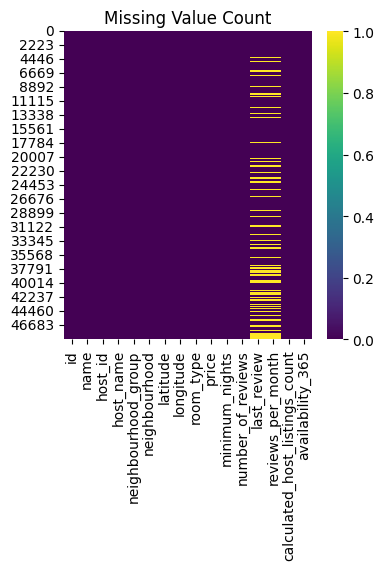

In [ ]:
# Visualizing the missing values

# Plot the missing value count as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Value Count')
plt.show()


### What did you know about your dataset?

 The AirBnb dataset, which we used for our exploratory data analysis and The dataset contains information on over 49,000 listings in New York City for the year 2019. The dataset includes information such as the name of the listing, the host's name, the neighborhood, the room type, the price, the number of reviews, and more.

This dataset is a valuable resource for analyzing the behavior of guests and hosts on the AirBnb platform and has been used in numerous studies and analyses. By using this dataset, we were able to gain insights into the world of AirBnb and the behavior of its users, informing our analysis and providing valuable insights into the hospitality industry.
Furthermore, this dataset has been used in various studies and analyses beyond our own research. Researchers have utilized this dataset to explore topics such as the impact of AirBnb on housing affordability, the spatial distribution of listings, and the relationship between host characteristics and listing performance. The breadth of information available in this dataset allows for a wide range of analyses and provides a comprehensive understanding of the AirBnb ecosystem.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Columns=df.columns   # this code is use for showing the name of columns in the data set
Columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:

# Dataset Describe
Description_of_the_dataset=df.describe() # this code is used for  describe the summary of the dataset
Description_of_the_dataset

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

 •	**id** : Unique ID

•	**name** : Name of the listing

•	**host_id** : Unique host_id

•	**host_name** : Name of the host

•	**neighbourhood_group** : location

•	**neighborhood** : area

•	**latitude** : Latitude range

•	**longitude** : Longitude range

•	**room_type** : Type of listing

•	**price** : Price of listing

•	**minimum_nights** : Minimum nights to be paid for

•	**number_of_reviews** : Number of reviews

•	**last_review** : Content of the last review

•	**reviews_per_month** : Number of checks 
per month

•	**calculated_host_listing_count** : Total count

•	**availability_365** : Availability around the year





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable. 
for i in df.columns.tolist():      # in this code iterate over each column of the DF
  print("No. of unique values in ",i,"is",df[i].nunique(),".") # then we print the number of unique values in the Data set

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


In [ ]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,total_reviews
0,A Suite with breathtaking views of NYC !,Simi,Manhattan,Theater District,40.75982,-73.98418,Private room,999.0,1,12,1.40,3,213,16.80
1,Tabor Room at Incentra Village Hotel,Incentra,Manhattan,West Village,40.73697,-74.00343,Private room,999.0,1,2,0.59,5,334,1.18
2,Private Bedroom in the Heart of Chelsea!,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,Private room,999.0,30,0,0.00,1,270,0.00
3,Luxury Full-Floor 2 Bed Loft w/Huge Private Roof,Andrew,Manhattan,Chelsea,40.74775,-73.99167,Entire home/apt,999.0,2,1,0.03,1,0,0.03
4,Amazing Views 3BR 2BA Bright and Spacious,Elizabeth Anne,Manhattan,Midtown,40.74420,-73.98748,Entire home/apt,999.0,2,54,1.49,1,58,80.46


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.shape   # first we need to know how much rows and column before the data wrangling



(48895, 16)

In [ ]:
# Drop the  unnecessary columns like name and host_name
df.dropna(subset=['name','host_name'],inplace=True)

In [ ]:
#After dropping the columns of name and host_name we need to check the rows and columns 
df.shape # hence we use again shape to konw .

(48858, 16)

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)
df.isna().sum()
# Null Values exist in only last reviews column

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.shape

(48858, 16)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

In [ ]:
df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#from above description we have seen that the maximum minimum nights is 1250 which is not possible. hence we make necesary changes 
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 365 if x>365 else x)  

In [ ]:
# The Minimum 'Price' is 0 which is not possible. hence make the changes 
df[df['price']==0] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
# replacing the 0 with NAN value
df['price'].replace(0, np.nan, inplace=True)

In [ ]:
'''
calculates the mean (average) price of Airbnb listings in the air DataFrame, 
rounds the result to the nearest integer, and assigns it to the variable mean_price
'''
mean_price = round(df['price'].mean())
mean_price

153

In [ ]:
'''
Fills any missing values (NaN) in the price column of the air DataFrame with the mean price calculated earlier (stored in the mean_price variable)
and updates the air DataFrame in place.
'''
df['price'].fillna(mean_price,inplace=True)

In [ ]:
# Describing the dataset after imputing the NAN values
df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.774755,6.938393,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.221451,17.461135,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Converting the last_review column to datetime object 
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
# Filtering the data as per price
df[(df['price'] >= 50) & (df['price'] <= 500)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65.0,1,0,NaT,0.00,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaT,0.00,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaT,0.00,6,2


Creates a new DataFrame called df_price_per_bed by adding a new column price_per_bedroom to the original air DataFrame, which contains the calculated price per bedroom for each Airbnb listing. The calculation is done by dividing the price column by the minimum_nights column for each listing. The assign() function creates a new DataFrame rather than modifying the original one.

In [ ]:
df_price_per_bed = df.assign(price_per_bedroom=df['price'] / df['minimum_nights'])
df_price_per_bed.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_bedroom
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0.00,1,365,50.0


Creates a pivot table called df_pivot from the air DataFrame with the id column as the index, the neighbourhood column as the columns, and the price column as the values.

In [ ]:
# Reshape data
df_pivot = df.pivot(index='id', columns='neighbourhood', values='price')

Creates a new DataFrame called df_melt by melting the air DataFrame with the id column as the identifier variable and price and minimum_nights as the value variables.

In [ ]:
df_melt = pd.melt(df, id_vars='id', value_vars=['price', 'minimum_nights'])
df_melt 

,id,variable,value
0,2539,price,149.0
1,2595,price,225.0
2,3647,price,150.0
3,3831,price,89.0
4,5022,price,80.0
...,...,...,...
97711,36484665,minimum_nights,2.0
97712,36485057,minimum_nights,4.0
97713,36485431,minimum_nights,10.0
97714,36485609,minimum_nights,1.0


In [ ]:
df.head(1) # after making the necessary changes we can  see the change in price and nights

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365


In [ ]:
df['neighbourhood_group'].unique() 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# The most expensive neighbourhoods to stay in are primarily in Manhattan, while the least expensive neighbourhoods are generally in Queens and Staten Island.
df.groupby(['neighbourhood','neighbourhood_group'],as_index=False)[['price']].max().sort_values(['price'],ascending=False)

,neighbourhood,neighbourhood_group,price
202,Upper West Side,Manhattan,10000.0
91,Greenpoint,Brooklyn,10000.0
4,Astoria,Queens,10000.0
119,Lower East Side,Manhattan,9999.0
61,East Harlem,Manhattan,9999.0
...,...,...,...
88,Grant City,Staten Island,80.0
177,Silver Lake,Staten Island,80.0
165,Richmondtown,Staten Island,78.0
172,Rossville,Staten Island,75.0


In [ ]:
# Availability as per Locations
df_availability = pd.DataFrame(df.groupby('neighbourhood_group')['availability_365'].mean())
df_availability.reset_index(inplace=True)
df_availability.rename(columns={'neighbourhood_group':'Location','availability_365':'Availability'},inplace=True)
df_availability

,Location,Availability
0,Bronx,165.704316
1,Brooklyn,100.235801
2,Manhattan,112.013445
3,Queens,144.487288
4,Staten Island,199.678284


In [ ]:
# counting the number of airbnb listings in each borough
borough_counts = df.groupby('neighbourhood_group').count()['id']
borough_counts

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: id, dtype: int64

In [ ]:
# Average price by neighbourhood 
df.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

<ipython-input-40-9c673b5eb9d2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)


neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

In [ ]:
# average preferred price by customers according to the location and room type
df_avg_preferred_price = pd.DataFrame(df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack() )
df_avg_preferred_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,67.023006,58.610169
Brooklyn,178.378625,76.601304,51.268765
Manhattan,249.249810,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
# number of host/hotels owner do thier businees as per which location
#Most visted prefered stay at particular location 
host_per_location = df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'],ascending=False).rename(columns={'neighbourhood_group':'Locations','host_id':'Number of Hosts'})
host_per_location = host_per_location.reset_index(drop=True)
host_per_location

,Locations,Number of Hosts
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


In [ ]:
# Where the customer pays the highest and lowest price according to location
highest_price = df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending=False).rename(columns={'neighbourhood_group':'Locations'})
lowest_price = df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price']).rename(columns={'neighbourhood_group':'Locations'})
combined_price = pd.merge(highest_price,lowest_price,on='Locations')
combined_price.rename(columns={'price_x':'Maximum Price','price_y':'Minimum Price'},inplace=True)
combined_price

,Locations,Maximum Price,Minimum Price
0,Brooklyn,10000.0,10.0
1,Manhattan,10000.0,10.0
2,Queens,10000.0,10.0
3,Staten Island,5000.0,13.0
4,Bronx,2500.0,10.0


In [ ]:
reviews_per_location  = df.groupby(['neighbourhood_group','name'],as_index=False)['number_of_reviews'].sum() #this code is useful for grouping the 'neighbourhood_group','name'
reviews_per_location.sort_values(by=['number_of_reviews'],ascending=False,inplace=True) #this code is useful for getting number of reviews in sorted way
reviews_per_location.rename(columns={'neighbourhood_group':'Locations','name':'Hotel Names','number_of_reviews':'Number of Reviews'},inplace=True)#code helps to rename the column name
reviews_per_location.head() # we can see the changes as below

,Locations,Hotel Names,Number of Reviews
35264,Manhattan,Private Bedroom in Manhattan,666
46431,Queens,Room near JFK Queen Bed,629
23231,Manhattan,Beautiful Bedroom in Manhattan,617
29570,Manhattan,Great Bedroom in Manhattan,607
46381,Queens,Room Near JFK Twin Beds,576


In [ ]:
#Find out top 5 host prices
top_host_prices = df.groupby(['host_name','host_id'],as_index=False)['price'].sum().sort_values(['price'],ascending=False).iloc[:5,:3]
top_host_prices

,host_name,host_id,price
33209,Sonder (NYC),219517861,82795.0
4856,Blueground,107434423,70331.0
31216,Sally,156158778,37097.0
29828,Red Awning,205031545,35294.0
18959,Kara,30283594,33581.0


In [ ]:
#The majority of listings are for Entire homes/apartments, with 25,393 listings.
df.groupby('room_type',as_index=False)['id'].count()

,room_type,id
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


In [ ]:
# The neighbourhood with the highest average price per night is Fort Wadsworth, with an average price of $800 per night.
df.groupby('neighbourhood',as_index=False)['price'].mean() \
      .sort_values(['price'],ascending=False) \
      .head(5)

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909


In [ ]:
df2 = df.copy()
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill in missing values in the 'last_review' column
df.set_index('last_review', inplace=True)
df = df.resample('D').mean()
df = df.fillna(method='ffill')

# Use the 'interpolate()' function to fill in missing values based on time-series data
df = df.interpolate(method='time')

# Reset the index of the DataFrame
df.reset_index(inplace=True)
df.head()

<ipython-input-48-e0bed0e4b073>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').mean()


,last_review,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2011-03-28,74860.0,394752.0,40.72488,-73.95018,55.0,2.0,1.0,0.01,1.0,0.0
1,2011-03-29,74860.0,394752.0,40.72488,-73.95018,55.0,2.0,1.0,0.01,1.0,0.0
2,2011-03-30,74860.0,394752.0,40.72488,-73.95018,55.0,2.0,1.0,0.01,1.0,0.0
3,2011-03-31,74860.0,394752.0,40.72488,-73.95018,55.0,2.0,1.0,0.01,1.0,0.0
4,2011-04-01,74860.0,394752.0,40.72488,-73.95018,55.0,2.0,1.0,0.01,1.0,0.0


Converting the last_review column in the df DataFrame from a datetime format to a string format using the apply() function and a lambda function. The lambda function applies the strftime() method to each value in the last_review column to format it as a string in the YYYY-MM-DD format. The converted values are then assigned back to the last_review column in the df DataFrame.

In [ ]:
df['last_review'] = df['last_review'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d'))
df['last_review']

0       2011-03-28
1       2011-03-29
2       2011-03-30
3       2011-03-31
4       2011-04-01
           ...    
3020    2019-07-04
3021    2019-07-05
3022    2019-07-06
3023    2019-07-07
3024    2019-07-08
Name: last_review, Length: 3025, dtype: object

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['month'] = df['last_review'].dt.month
df['month']

0       3
1       3
2       3
3       3
4       4
       ..
3020    7
3021    7
3022    7
3023    7
3024    7
Name: month, Length: 3025, dtype: int64

In [ ]:
# see that the busiest season of year for Airbnb bookings in New York City is in the summer months, particularly in April and May months.
def check_months(df):
    summer = ['03','04','05','06','07','08']
    count_summer = 0
    count_winter = 0
    sm = []
    for index, row in df.iterrows():
        month = str(row['last_review'])[5:7]
        if month in summer:
            count_summer += 1
            sm.append(month)
        else:
            count_winter += 1
    from collections import Counter
    s = Counter(sm)
    print(s.most_common(2))
    print(f'In Summer mmonths: {count_summer}, and in Winter months: {count_winter}')
check_months(df)


[('05', 279), ('04', 270)]
In Summer mmonths: 1575, and in Winter months: 1450


In [ ]:
# Count the number of listings per host
host_counts = df['host_id'].value_counts()

# Count the number of hosts with a single listing
single_listing_hosts = (host_counts == 1).sum()

# Calculate the percentage of hosts with a single listing
single_listing_percentage = single_listing_hosts / len(host_counts) * 100

print(f"{single_listing_percentage:.2f}% of hosts have only single listing")

89.61% of hosts have only single listing


### What all manipulations have you done and insights you found?

The insights that I found in all the manipulation are given below:-

1)Dropping Columns: The code drops the columns 'name' and 'host_name' where there are missing values.

2)Handling Missing Values: The code fills the missing values in the 'reviews_per_month' column with 0.

3)Imputing Zero and NaN Values: The code identifies and replaces the values of 0 in the 'price' column with NaN.

4)Calculating Mean Price: The code calculates the mean price of Airbnb listings and assigns it to the variable 'mean_price'.

5)Imputing Missing Values: The code fills the missing values (NaN) in the 'price' column with the mean price calculated earlier.

6)Converting Data Types: The code converts the 'last_review' column to a datetime object.

7)Filtering Data: The code filters the data based on the price range, selecting listings with prices between $50 and $500.

8)Reshaping Data: The code reshapes the data by pivoting the 'neighbourhood' column as columns, 'id' as index, and 'price' as values.

9)Neighborhood Analysis: The code provides insights into the most expensive and least expensive neighborhoods to stay in, as well as the average availability of listings by neighborhood group.

10)Host Analysis: The code analyzes the number of hosts in each neighborhood group, the average price by neighborhood, and the average preferred price by location and room type.

11)Review Analysis: The code examines the number of reviews per location and identifies the top hosts based on prices and the majority of listing types.

12)Time-Series Analysis: The code performs time-series analysis by filling missing values in the 'last_review' column, resampling the data by day, and interpolating missing values based on time-series data. It also explores the busiest seasons for Airbnb bookings in New York City.

13)Hosts with Single Listings: The code calculates the percentage of hosts with only a single listing.

These manipulations provide insights into various aspects of the dataset, including neighborhood pricing, host activity, and time-series patterns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Bar Chart - Count of listings in each neighborhood group:

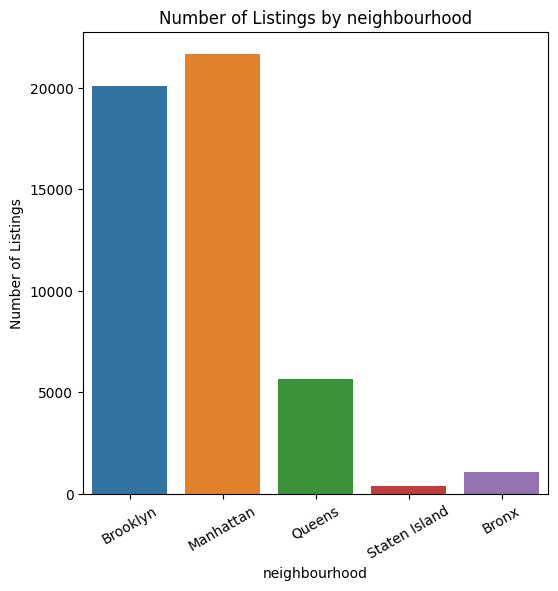

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='neighbourhood_group')
plt.xticks(rotation=30)
plt.xlabel('neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by neighbourhood')
plt.show()  


##### 1. Why did you pick the specific chart?

This chart helps us understand the number of listings in each neighborhood. Each neighborhood is shown as a bar, and the height of the bar tells us how many listings there are. This makes it easy to compare the number of listings between different neighborhoods. The code also takes care of the labels on the chart, rotating them if they are too long. It also adds clear labels and a title to the chart, so it's easy to understand what it's showing. Overall, this chart helps us see how the listings are spread out across the different neighborhoods.










 2. What is/are the insight(s) found from the chart?

The chart providee us insight as how many rental listings are in each neighborhood group. We can see which neighborhoods have more listings and which have fewer. This helps us understand which neighborhoods are popular and in demand. It also shows if there are any big differences between neighborhoods in terms of the number of listings. This information can be helpful for people looking to rent or invest in real estate. If some neighborhoods have a lot more or a lot fewer listings, it might be because of things like where they are located, what amenities they have, or how expensive the housing is.








 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the countplot can help businesses in a positive way. They can find popular neighborhoods for better marketing and make smart decisions about property investments. They can also discover new opportunities in neighborhoods with less competition.  Negative growth might happen if the rental market slows down overall or if certain neighborhoods consistently have fewer listings. 





#### Chart - 2- Pie chart of Room Types

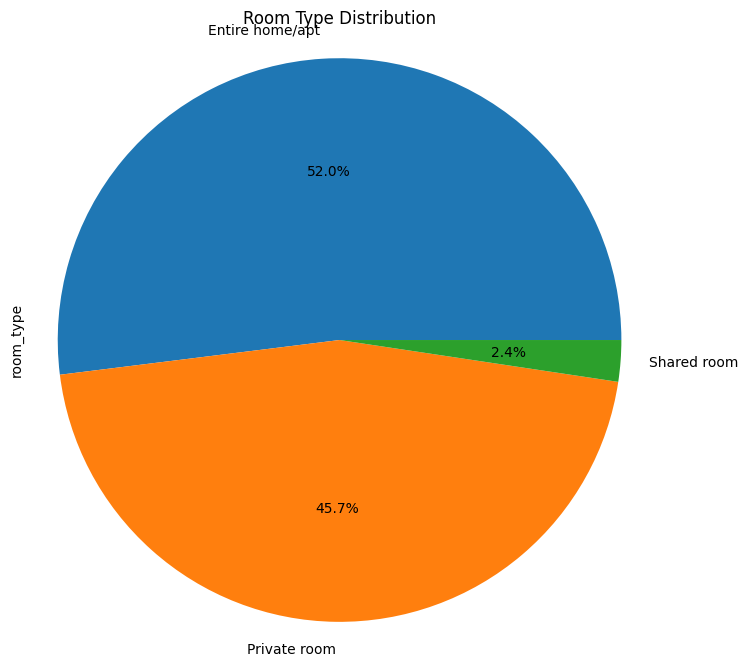

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 8))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Room Type Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart to show the distribution of room types because it gives a clear picture of the different categories and their proportions. The chart is easy to understand as it visually represents the relative sizes of each room type. By using percentages as labels, we can see the exact proportions of each category. In simple terms, the pie chart helps us see how much of each room type is present in the dataset in a straightforward way.






##### 2. What is/are the insight(s) found from the chart?

The pie chart of "Room Type Distribution" provides the following insights:

It shows the most popular room type based on the largest slice of the pie.
We can compare the proportions of different room types to understand their popularity.
The percentages as labels show the exact proportion of each room type.
It reveals if a room type is significantly more or less common compared to others.
The chart gives a quick overview of the variety of room types available on Airbnb.
It helps identify any imbalances in room type distribution that may require attention.
Hosts can use this information to make informed decisions when listing their properties.
These insights guide strategic decisions regarding marketing and inventory management on Airbnb.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to create both the positive impact and negative impact and both the impact are given below:


Positive Business Impact:


1) Understanding the popular room types helps Airbnb attract more guests and increase revenue.


2)Hosts can benefit by offering the room types that are in high demand, leading to better occupancy rates and higher profits.


3)The chart shows the variety of room types available, appealing to a wider range of guests with different preferences.

Negative Growth:

1)If certain room types are oversaturated, hosts may face increased competition and lower profitability.


2)Less common room types may indicate lower demand, resulting in slower growth for hosts offering those types.

By using the insights wisely, Airbnb can address challenges, optimize offerings, and seize growth opportunities in both popular and less common room types.






#### Chart - 3-Distribution of Airbnb listing prices by room type (Bivariate)

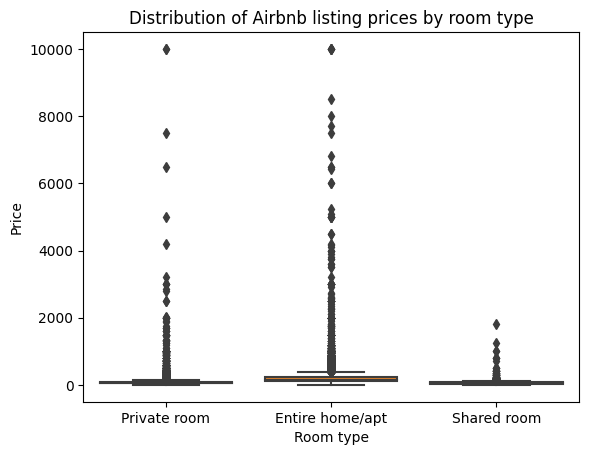

In [ ]:
# Create the boxplot
sns.boxplot(x='room_type', y='price', data=df)

# Add labels and titles
plt.xlabel('Room type')
plt.ylabel('Price')
plt.title('Distribution of Airbnb listing prices by room type')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a boxplot for this example because it is a useful way to visualize the distribution of prices for different room types in the Airbnb NYC 2019 dataset. A boxplot allows us to easily compare the median, quartiles, and range of prices for each room type, as well as identify any outliers or extreme values.
Basically, a boxplot gives a clear picture of how prices are distributed for each room type, helping us understand the pricing patterns in the dataset.






##### 2. What is/are the insight(s) found from the chart?

The data shows that entire home/apartment listings have the highest median price, followed by private rooms and shared rooms. This means that renting an entire home or apartment is usually more expensive than renting just a private room or a shared room. Additionally, there are some listings with extremely high prices in all three room types, which could be luxurious or high-end accommodations. It's important to investigate these outliers further to ensure the accuracy and quality of the data.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information gained from this boxplot can have positive impacts on both Airbnb hosts and guests in NYC. Hosts aiming to maximize their profits can consider renting out entire homes/apartments, as these tend to have higher median prices. On the other hand, guests looking for more affordable options can opt for private or shared rooms, which are generally cheaper.

However, it is important to note that this boxplot alone does not provide insights that would result in negative growth. To make well-informed business decisions, it is necessary to conduct further analysis and consider additional factors beyond room type and price. This will help in gaining a comprehensive understanding of the Airbnb market dynamics in NYC.






#### Chart - 4-Relation B/W Locations and Availability 365 days (Bivariate)

Brooklyn IQR: 188.0
Manhattan IQR: 230.0
Queens IQR: 284.0
Staten Island IQR: 255.0
Bronx IQR: 276.5


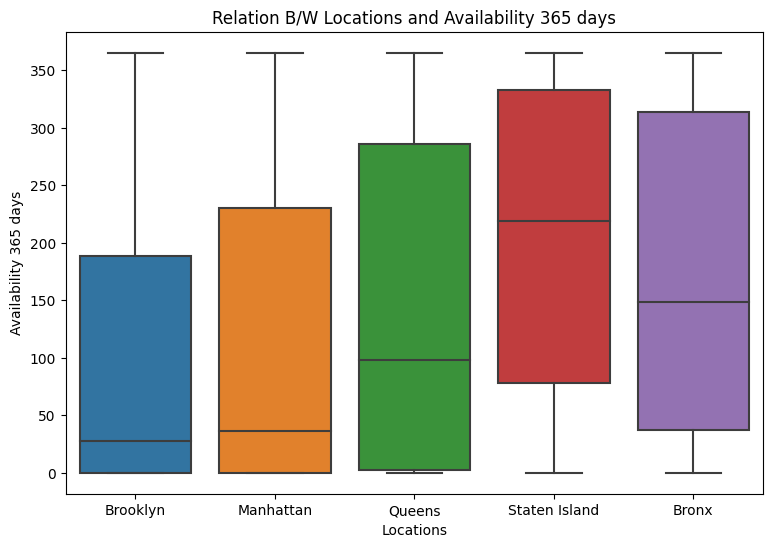

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')
ax.set_xlabel("Locations")
ax.set_ylabel("Availability 365 days")
ax.set_title("Relation B/W Locations and Availability 365 days")

# calculate IQR for each neighbourhood group
iqr_dict = {}
for group in df['neighbourhood_group'].unique():
    subset = df.loc[df['neighbourhood_group'] == group]
    q1 = subset['availability_365'].quantile(0.25)
    q3 = subset['availability_365'].quantile(0.75)
    iqr = q3 - q1
    iqr_dict[group] = iqr
    print(f"{group} IQR: {iqr}")

plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot to visualize the relationship between the neighbourhood group and the availability of Airbnb listings in NYC because it is an effective way to compare the distribution of a continuous variable (availability) across different categories (neighbourhood group).

Overall, a boxplot is a clear and informative way to visualize the distribution of prices for different room types in the Airbnb NYC dataset, and it can help us gain insights into the pricing patterns of the listings in the dataset.






##### 2. What is/are the insight(s) found from the chart?

According to the data, Staten Island has the highest median availability of Airbnb listings throughout the year, followed by Brooklyn, Queens, Manhattan, and the Bronx.

The Bronx and Queens have a wider range of availability, suggesting that there are more listings available for both shorter and longer durations compared to other neighborhood groups.

Brooklyn has the smallest interquartile range, indicating less variation in availability among its listings.

Interestingly, Brooklyn has the lowest median availability of Airbnb listings throughout the year, implying that it is a relatively less popular neighborhood for rentals.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the box plot and the calculation of the interquartile range (IQR) for each neighborhood group can potentially have a positive impact on the business of Airbnb hosts in New York City.

This information can be valuable for hosts in deciding which neighborhood group to list their property in and how to set the prices based on the competition in the area.

Regarding negative growth, the current analysis does not provide any insights that directly lead to negative growth. However, negative growth could occur if hosts fail to adjust their pricing and availability based on the demand in their specific area. For example, if a host's property is located in a neighborhood group with a high IQR, they may be able to charge a higher price or offer limited availability due to less competition. However, if the host sets their price too high or offers too little availability without considering market demand, they may struggle to attract guests and experience negative growth in their business.






#### Chart - 5 - Scatter Plot of Price and Minimum Nights (Bivariate)

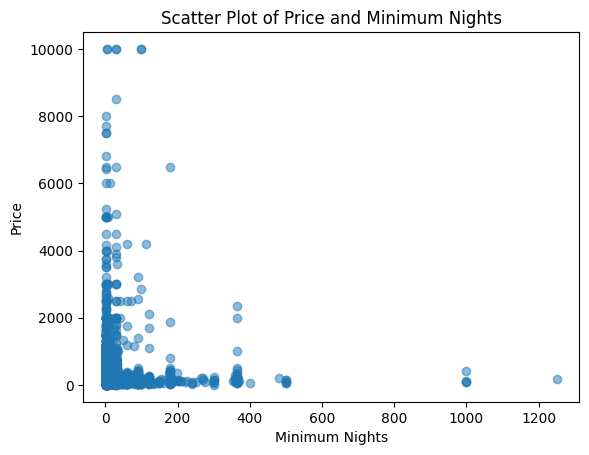

In [ ]:
# Chart - 5 visualization code
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price and Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a scatter plot of price and minimum nights because it can help us visualize the relationship between these two features.

Scatter plots are useful when we want to compare two continuous variables and see if there is any relationship or correlation between them. In this case, we want to see if there is any relationship between the minimum number of nights a guest must book to stay at an Airbnb listing and the price per night.
The title and labels on the x-axis and y-axis provide clear information about what the plot represents. By using transparency, we can see overlapping points more easily. Overall, the scatter plot helps us visualize the relationship between minimum nights and price in a simple and straightforward way.






##### 2. What is/are the insight(s) found from the chart?

The insights that I found That  scatter plot as it shows that prices vary for different minimum nights. There is no clear relationship between the two variables, but we can see clusters of data points with similar price ranges. Most listings have lower prices and shorter minimum nights. Overall, the plot helps us understand the distribution of prices based on minimum nights for Airbnb listings.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can help Airbnb hosts make positive business decisions. By understanding the relationship between price and minimum nights, hosts can set competitive prices and attract guests. However, the scatter plot does not provide any insights that directly lead to negative growth. However, there are no specific insights in the scatter plot that directly lead to negative growth. The absence of a clear linear relationship between price and minimum nights indicates that there may not be a straightforward pricing formula that guarantees negative growth. Negative growth could occur if hosts do not carefully consider market demand, competition, and pricing dynamics beyond the scope of this scatter plot. It is essential for hosts to analyze other factors such as location, amenities, and customer preferences to optimize their business and avoid negative growth.

#### Chart - 6-  Scatter Plot of Price and Number of Reviews (Bivariate)

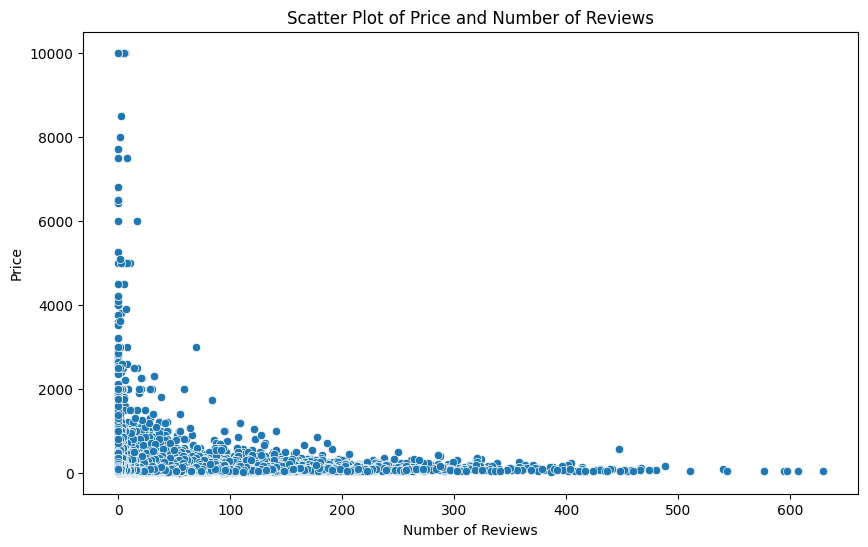

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="number_of_reviews", y="price")
plt.title("Scatter Plot of Price and Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


##### 1. Why did you pick the specific chart?

I choose the The scatter plot.beacuse the  scatter plot was  show the relationship between two variables, "number_of_reviews" and "price." It helps us understand if there is a connection between the number of reviews a listing has and its price. By using a scatter plot, we can visually observe individual data points and look for any patterns or trends. The plot's size and labels ensure clear representation of the data. Overall, the scatter plot helps us understand how the number of reviews relates to the price of listings in a simple and straightforward way.






##### 2. What is/are the insight(s) found from the chart?

There is a wide range of prices for different numbers of reviews. The data points are scattered across the plot, indicating variations in prices regardless of the number of reviews.There doesn't seem to be a clear and strong linear relationship between the number of reviews and the price. The data points are spread out and do not form a distinct pattern or trend line.

However, we can observe that there are more listings with a higher number of reviews and lower prices. This is indicated by the density of data points in the bottom-right region of the plot.There are also some listings with a high number of reviews and higher prices, but they are less common and scattered throughout the plot.

Overall, the scatter plot helps us understand the distribution of prices based on the number of reviews for Airbnb listings. It shows that there isn't a straightforward correlation between these two variables, but it provides insights into the range and clustering of prices for listings with different numbers of reviews.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot can help Airbnb hosts in creating a positive business impact. Understanding the relationship between the number of reviews and price can guide hosts in setting competitive prices based on review numbers to attract more guests and increase bookings. However, relying solely on review numbers for pricing decisions may lead to negative growth. Hosts should consider other factors like location, amenities, and market demand to avoid setting prices too low and ensure overall business success.






#### Chart - 7-  Distribution of Prices by Neighbourhood Group (Bivariate)

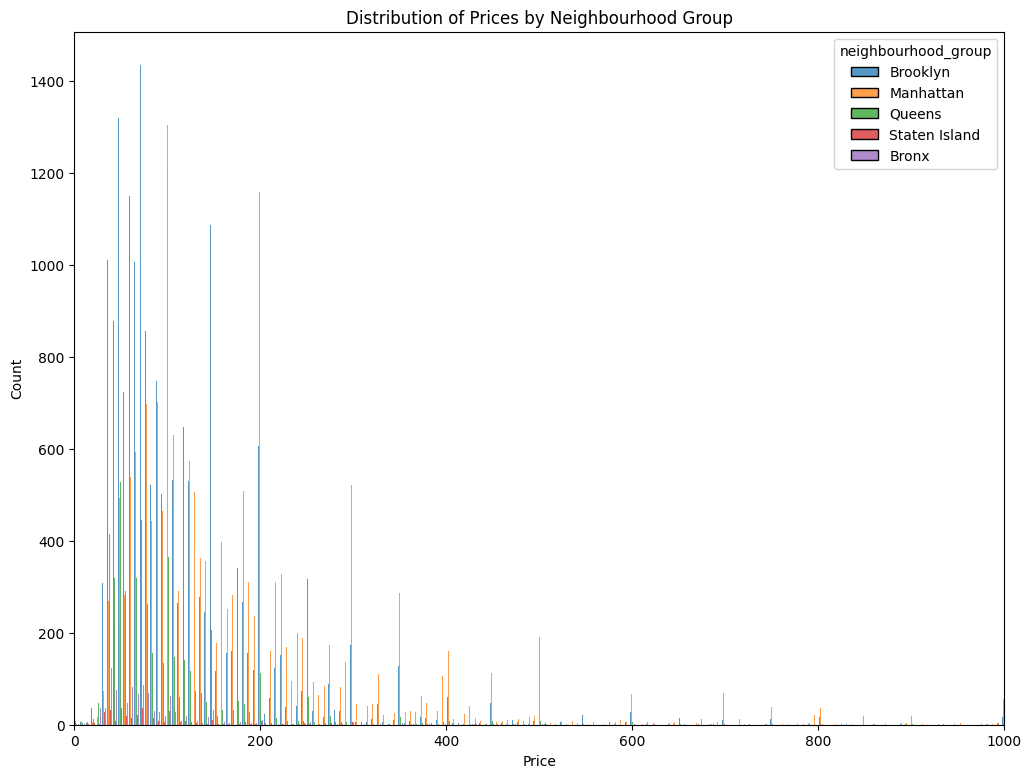

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12,9))
sns.histplot(data=df, x="price", hue="neighbourhood_group", multiple="dodge", shrink=0.8)
plt.title("Distribution of Prices by Neighbourhood Group")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0,1000)
plt.show()


##### 1. Why did you pick the specific chart?

I choose this specific chart beacuse it helps to  compare the price distributions across different neighborhood groups. The dodged bars show each group's price distribution side by side, making it easier to see differences or similarities. The x-axis represents the price values, and the y-axis shows the count of occurrences within each price range.
A histogram is a common chart type for visualizing the distribution of a continuous variable, like prices. It helps us see how prices are spread out and if there is any specific pattern, like a normal or skewed distribution. The use of color (hue) in the chart helps distinguish the bars for each neighborhood group, providing more information and enabling us to spot any trends or patterns unique to each group.






##### 2. What is/are the insight(s) found from the chart?

The insights that I found in this chart are that it helps us compare how prices are distributed across different neighborhood groups. We can see if there are any differences or similarities in price ranges for each group. It also shows which price ranges are more common in each group, indicating if certain groups tend to have higher or lower prices. The chart can identify any unusual values or outliers that stand out from the majority. By using different colors for each group, we can directly compare their price distributions and look for any specific patterns or trends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart that we can see the positive impact on business decisions. By analyzing price distributions, businesses can develop targeted pricing strategies and tailor marketing efforts based on customer preferences. However, negative growth can occur if a business fails to differentiate itself or faces oversaturation in a specific market segment. The actual impact depends on factors like business goals, market conditions, and data quality. It's crucial to consider these insights within the specific business context.

#### Chart - 8 -Histogram of Number of Reviews (Univariate)


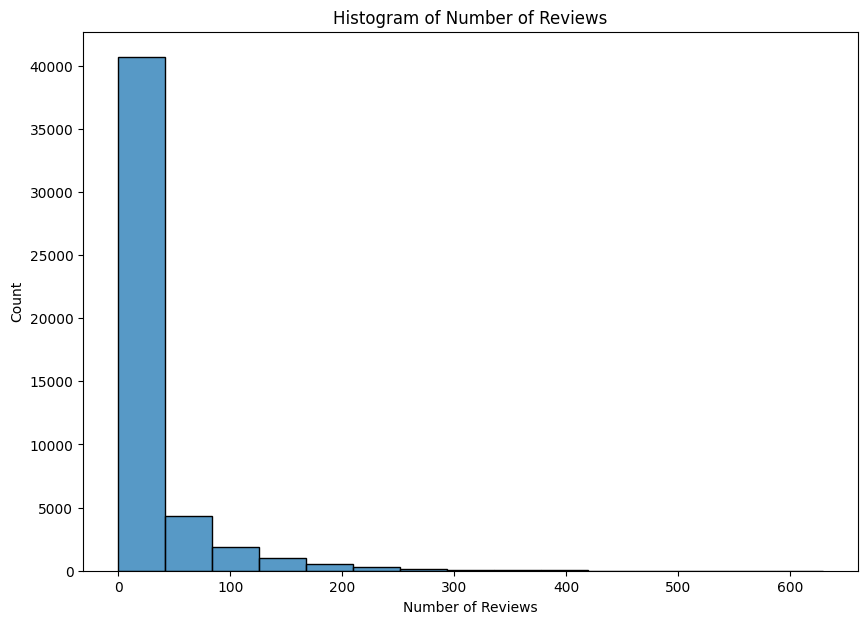

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='number_of_reviews', bins=15)
plt.title('Histogram of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I choose the specific chart histogram  beacuse it helps us to understand  visualize the distribution of the number of reviews. It presents the frequency of different review counts, allowing us to see patterns and concentrations. By using bins, the chart provides a clear and intuitive representation of the data. Histograms are commonly used and easily understood. Overall, this chart helps businesses gain insights into customer engagement, product popularity, and the overall review landscape.

##### 2. What is/are the insight(s) found from the chart?

The insights that I found from this chart is that the distribution of review counts, showing if there are concentrated or evenly spread out reviews. It reveals the frequency of reviews in different ranges, helping businesses understand the overall engagement and popularity of their product or service. The shape of the histogram indicates if the distribution is skewed or if there are outliers, which can highlight trends or exceptional circumstances. Additionally, analyzing the histogram helps assess the quality of the data by identifying any unexpected patterns or inconsistencies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the insights gained from a histogram on a business will depend on the specific insights and the context of the business. In general, insights that provide a better understanding of customer behavior, preferences, and needs can help a business create a positive impact by enabling the development of better products and services, more effective marketing strategies, and better customer experiences. For example, if the histogram reveals that the majority of customers leave a high number of reviews, a business can use this information to improve its customer service and engagement strategies to further increase customer loyalty.

On the other hand, insights that reveal negative patterns or trends in customer behavior can lead to negative growth if not addressed properly. For example, if the histogram reveals that there is a cluster of low reviews or a large number of negative reviews, a business may need to investigate the reasons behind this trend and take corrective actions to improve its products, services, or customer experience. If these issues are not addressed, customers may become dissatisfied and choose to take their business elsewhere, resulting in negative growth for the business.

#### Chart - 9-Top 10 Cheapest Neighborhoods (Bivariate)

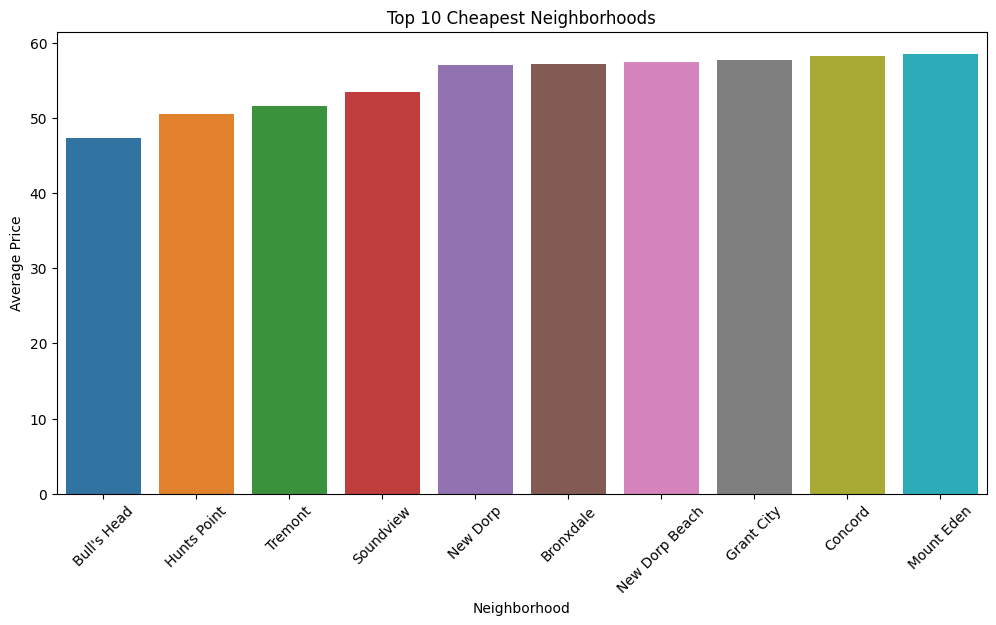

In [ ]:
# Chart - 9 visualization code
cheapest_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cheapest_neighborhoods.index, y=cheapest_neighborhoods.values)
plt.title('Top 10 Cheapest Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I selected the bar plot beacuse it is  easy-to-understand chart that visually compares the prices of different neighborhoods. It ranks the top 10 most expensive neighborhoods based on their average prices using vertical bars. This makes it simple to see and compare which neighborhoods have the highest prices. The labels on the chart are clear, and the x-axis labels are rotated to avoid overlapping. Overall, this bar plot provides a straightforward way to understand and compare neighborhood prices.






##### 2. What is/are the insight(s) found from the chart?

The chart of the top 10 cheapest neighborhoods based on average price provides insights on affordability, price range, targeting budget-conscious customers, cost of living comparison, pricing strategy, and market distribution. These insights can help businesses understand the affordability of different neighborhoods, identify potential market segments, and make informed pricing decisions. However, it's important to consider the specific dataset, context, and goals when interpreting these insights.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Positive and Negative impact gain from this chart are given below:
Positive Impact:

Targeting Affordability: Businesses can attract price-sensitive customers by offering competitive prices in these neighborhoods, expanding their customer base.

Market Expansion: Identifying affordable neighborhoods reveals untapped markets, providing opportunities for business growth and reaching new customer segments.

Price Optimization: Businesses can optimize pricing strategies based on the affordability levels of different neighborhoods, offering discounts or adjusting prices to align with customer budgets.

Negative Impact:

Profit Considerations: Lower average prices may affect profit margins, requiring businesses to optimize costs to maintain profitability.

Competition and Price Pressure: Increased competition in cheapest neighborhoods may lead to price erosion, impacting profitability unless businesses differentiate themselves with unique value or quality.

It's important to note that the impact depends on various factors, including business goals, market dynamics, and data quality. Considering these insights within the business context will help evaluate their positive or negative impacts.






#### Chart - 10-Top 10 Most Expensive Neighborhoods'(Bivariate)

In [ ]:
from pandas.io.parsers.readers import DataFrame
# Chart - 10 visualization code
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

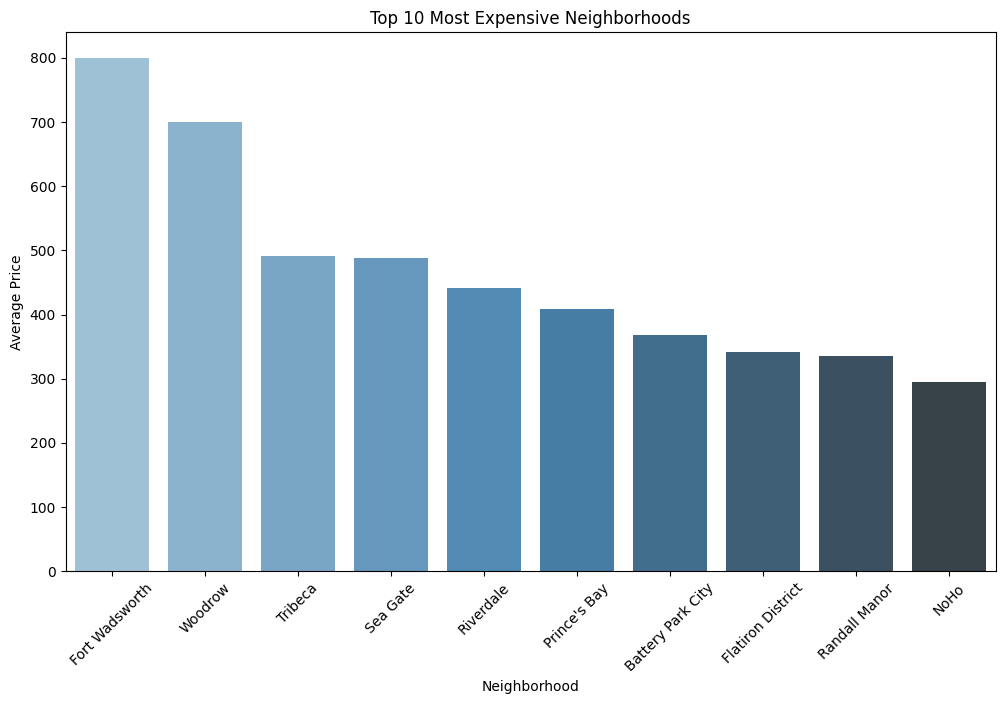

In [ ]:
# Chart - 10 visualization code
top_10_expensive = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values, palette='Blues_d')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a bar plot to visualize the top 10 most expensive neighborhoods because it is a clear and effective way to display the average price of listings in different neighborhoods. A bar plot allows for easy comparison of the prices between the top 10 neighborhoods, and it also provides a visual representation of the data that can be quickly and easily understood by viewers. Additionally, a bar plot allows for the inclusion of other information, such as the names of the neighborhoods, which can provide additional context and insights. Overall, a bar plot is a useful and informative way to display this type of data.


##### 2. What is/are the insight(s) found from the chart?

The insights gained from this bar plot could include the most desirable and high-end neighborhoods for rentals, any potential outliers or patterns in the data, and any differences in pricing patterns between different geographic locations or types of accommodations. This information could be useful for renters in selecting accommodations in the most sought-after areas, and for hosts in understanding the competitive pricing landscape and developing targeted pricing strategies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the bar plot reveals a significant difference in pricing between the top 10 most expensive neighborhoods and other neighborhoods, this could potentially have a positive or negative impact on the rental market, depending on the preferences and requirements of the renters. For example, if the top 10 most expensive neighborhoods are highly sought-after and in high demand, this could lead to increased revenue and positive growth for hosts in those areas. On the other hand, if the high pricing in these neighborhoods leads to a lack of demand and difficulty in finding renters, this could lead to decreased revenue and negative growth for hosts in those areas. It is important to note that other factors such as geographic location, amenities, and type of accommodation can also impact the pricing of rentals in different neighborhoods.

#### Chart - 11 - Correlation Heatmap -Exploring Relationships in the Dataset

<ipython-input-3-0fbce40311da>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


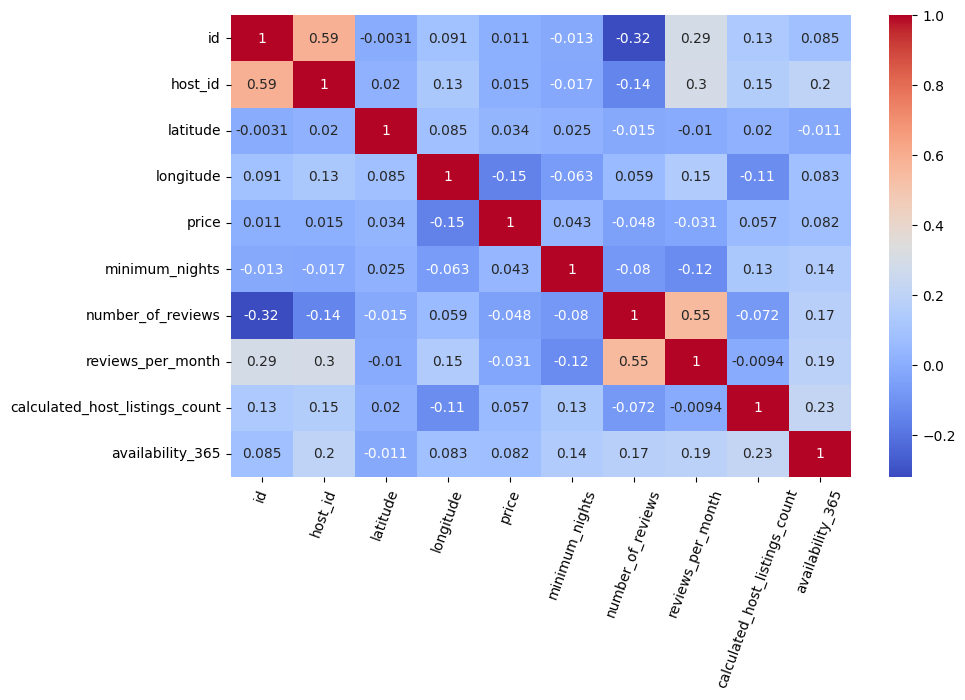

In [ ]:
# Correlation Heatmap visualization code
# Create a correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
# Generate a heatmap using the Seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.xticks(rotation=70)
plt.show()

##### 1. Why did you pick the specific chart?

I choose the specific chart because it help me in the following way:

Visual Representation: The heatmap uses colors to show patterns and relationships between variables. The color intensity represents how strong and in which direction the variables are correlated.

Clear Interpretation: Annotations on the heatmap directly display correlation values. This makes it easy to understand the correlation coefficients without looking at the raw data.

Efficient Use of Space: The heatmap efficiently uses the available space to show the correlation matrix. Each cell represents the correlation between two variables. This is helpful for datasets with many variables.

Intuitive Color Mapping: The 'coolwarm' colormap in the code uses cool and warm colors to represent negative and positive correlations. This makes it easy to see the strength and direction of the correlations.



##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap shows the strength and direction of relationships between variables. Dark red indicates strong positive correlations, dark blue indicates strong negative correlations, and lighter colors indicate weaker or no correlations. The heatmap helps identify variables that have a strong relationship with each other, detects patterns or dependencies between variables, and reveals multicollinearity (high correlations between multiple variables). It's important to note that specific insights depend on the dataset and require domain knowledge for meaningful interpretation.






#### Chart - 12- Exploring Relationships: Pair Plot of Price, Minimum Nights, Number of Reviews, and Reviews per Month






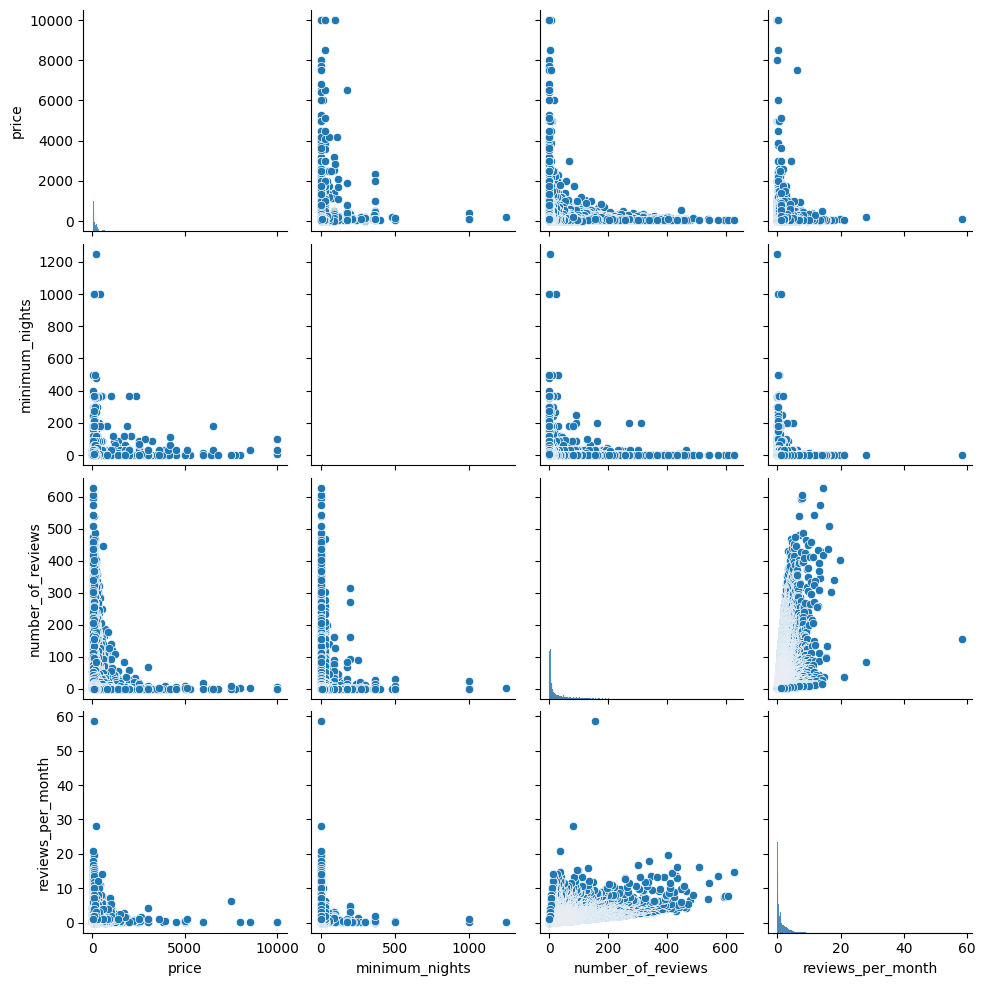

In [ ]:
# Pair Plot visualization code
# Select the columns for the pair plot
columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

# Create the pair plot
sns.pairplot(df[columns])

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chosse the pair plot because it helps to visualize relationships between multiple variables in a dataset. It creates a grid of scatterplots, showing how variables are related and allowing for the identification of patterns. The plot also displays variable distributions and enables multivariate analysis. The pair plot efficiently uses space, making it suitable for datasets with many variables. The code uses the Seaborn library, known for its user-friendly statistical graphics functions. Overall, the pair plot helps understand correlations, data distributions, and variable interactions.

##### 2. What is/are the insight(s) found from the chart?

The insights that I found in this chart are Price and minimum nights have no clear relationship.
Price and number of reviews also show no significant correlation.
Price and reviews per month do not exhibit a noticeable pattern.
There might be a weak positive correlation between minimum nights and number of reviews.
No apparent relationship exists between minimum nights and reviews per month.
There seems to be a positive correlation between number of reviews and reviews per month.
These insights provide a basic understanding of the relationships between the variables examined. However, it's important to note that there could be additional patterns or relationships that were not captured in this particular visualization. Further exploration of the dataset is recommended to uncover more insights.






## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

I suggest the client to achive following Business Objective:


1) To optimize your pricing strategy, it's important to adjust your prices based on market demand and seasonal trends. By analyzing the pricing distribution across different neighborhood groups, we can further tailor their prices accordingly.

2)To increase visibility and attract potential renters, it's advisable to target our marketing efforts towards the top 10 cheapest and most expensive neighborhoods. This way, you can capture the attention of customers who are specifically looking for affordable or upscale options.

3)By studying the density plot of price distribution by neighborhood group, we can identify pricing trends in different areas. This will help us to  understand which neighborhoods are more likely to attract higher-paying customers and adjust your pricing strategy accordingly.

4)To enhance customer satisfaction and generate positive word-of-mouth referrals, it's crucial to address areas of improvement raised in reviews and ratings. By actively working on the feedback received from customers, we can make necessary improvements and ensure a better overall experience for your renters.

5)Additionally, analyzing the distribution of the number of reviews and ratings can help we assess our performance and identify areas for further improvement. By understanding which listings receive more reviews and higher ratings, we can identify popular properties and focus on expanding in those areas.



# **Conclusion**

The conclusion of the EDA project on Air bnd data analysis are given below:

1) To optimize our pricing strategy, adjust our prices based on what customers are willing to pay and the trends you observe throughout the year. Consider the prices in different neighborhoods and adjust accordingly.

2) To attract more renters, focus on marketing efforts on the top 10 cheapest and most expensive neighborhoods. This will help increase  visibility and catch the attention of potential customers. Use a graph that shows the prices in different areas to understand pricing trends.

3)Improve customer satisfaction and encourage positive word-of-mouth by addressing the issues mentioned in reviews and ratings. Take feedback seriously and make necessary changes to provide a better experience. It can also see how many reviews and ratings  receive to evaluate performance and find areas for improvement.

4)To keep experienced hosts engaged, offer them special deals and promotions as incentives. This will encourage them to continue using the platform and provide excellent service to renters.

Analyze the number of reviews and ratings to identify popular listings and areas with potential for growth. By understanding which properties receive more attention, you can focus on those and expand in those areas.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***